============================================================================================

# Prepare Color Histogram & Sizes Data For KNN


============================================================================================

In [1]:
import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
% matplotlib inline

from subprocess import check_output
print (check_output(["ls", "data"]).decode("utf-8"))


athenaeum_authors.csv
athenaeum_authors_preview.csv
athenaeum_painting_filtered.csv
athenaeum_painting_movement.csv
athenaeum_painting_movement_test.csv
athenaeum_painting_movement_train.csv
athenaeum_paintings.csv
athenaeum_paintings_sizes.csv
color_hist_kmeans_206552.csv
color_histograms.csv
color_hist_size_206552.csv
complete_data.csv
extra_tree_com.csv
grad_boost_com.csv
images
images_athenaeum
images_sizes_2325.csv
kmeans_centers.csv
kmeans.png
kmeans_tsne.png
knn_com.csv
model_accuracy.csv
movement_hist_test.csv
movement_hist_train.csv
nbc_com.csv
net1_ensemble_stacking.csv
net_predicted.csv
nn_pca_test.csv
nn_pca_train.csv
painter_info_clean.csv
painting_info_clean.csv
pca20_kmeans_test.csv
pca20_kmeans_train.csv
resized_200
rf_com.csv
test_author200.csv
test_data.csv
test_hist_author_knn.csv
test_hist_author_rf.csv
train_author200.csv
train_data.csv
train_hist_author_knn.csv
train_hist_author_rf.csv
xgb_com.csv



In [3]:
test_author200 = pd.read_csv('data/test_author200.csv')
train_author200 = pd.read_csv('data/train_author200.csv')
color_hist = pd.read_csv('data/color_histograms.csv')

print "[INFO] The size of test data: " + str(test_author200.shape)
print "[INFO] The size of train data: " + str(train_author200.shape)
print "[INFO] The size of color histogram: " + str(color_hist.shape)
train_author200.head(3)

[INFO] The size of test data: (12473, 12)
[INFO] The size of train data: (49890, 12)
[INFO] The size of color histogram: (206550, 32)


,medium,painting_location,height,article_type,painting_url,painting_dates,painting_title,author_id,painting_id,width,height_px,width_px
0,oil on canvas,Munch-museet (Norway - Oslo),90.0,Painting,http://www.the-athenaeum.org/art/display_image...,1907-1908,Mason and Mechanic,1793,52573,69.5,722,534
1,oil on canvas,"Royal Botanic Gardens, Kew (United Kingdom - ...",107.0,Painting,http://www.the-athenaeum.org/art/display_image...,circa 1880,A South African Sedge,9266,207890,45.0,944,384
2,oil on canvas,Watts Gallery - Compton (Surrey) (United King...,137.0,Painting,http://www.the-athenaeum.org/art/display_image...,1849-1850,Under the Dry Arch,502,214715,101.5,944,677


In [4]:
train_subset = train_author200[['painting_id', 'height_px', 'width_px']]
test_subset = test_author200[['painting_id', 'height_px', 'width_px']]
train_subset.head(2)

,painting_id,height_px,width_px
0,52573,722,534
1,207890,944,384


In [5]:
train_hist = color_hist.merge(train_subset, how = 'right', on = 'painting_id')
print "[INFO] The size of train histogram for KNN" + str(train_hist.shape)
train_hist.head(2)

[INFO] The size of train histogram for KNN(49890, 34)


,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_px,width_px
0,444,11653,141479,107241,3576,1031,1010,3886,568,2650,...,144006,99116,46843,25371,63071,67621,69665,480656,742,952
1,444,12097,1429,713,600,581,1362,3304,8280,16148,...,174675,107953,51343,77403,128000,147619,172075,150541,941,718


In [6]:
test_hist = color_hist.merge(test_subset, how = 'right', on = 'painting_id')
print "[INFO] The size of test histogram for KNN" + str(test_hist.shape)
test_hist.head(2)

[INFO] The size of test histogram for KNN(12473, 34)


,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_px,width_px
0,444,12077,7603,1687,587,348,403,538,671,959,...,99139,69539,24143,46874,97427,117568,102332,79799,555,800
1,444,87820,18868,4502,1403,696,672,763,857,1430,...,352276,123167,17879,17396,139326,225701,318966,413491,871,1280


In [9]:
# prepare width & height ratio
train_hist['height_width_ratio'] = train_hist['height_px'] / train_hist['width_px']
test_hist['height_width_ratio'] = test_hist['height_px'] / test_hist['width_px']

In [11]:
test_hist.head(2)

,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_px,width_px,height_width_ratio
0,444,12077,7603,1687,587,348,403,538,671,959,...,69539,24143,46874,97427,117568,102332,79799,555,800,0.693750
1,444,87820,18868,4502,1403,696,672,763,857,1430,...,123167,17879,17396,139326,225701,318966,413491,871,1280,0.680469


In [42]:
# Random Forest color histogram Dataset
train_hist.to_csv("data/train_hist_author_rf.csv", index=False)
test_hist.to_csv("data/test_hist_author_rf.csv", index=False)

In [36]:
# Scaling height_px, width_px for KNN
train_hist.iloc[:, -2] = train_hist.iloc[:, -2] / train_hist.height_px.max()
train_hist.iloc[:, -1] = train_hist.iloc[:, -1] / train_hist.width_px.max()

test_hist.iloc[:, -2] = test_hist.iloc[:, -2] / train_hist.height_px.max()
test_hist.iloc[:, -1] = test_hist.iloc[:, -1] / train_hist.width_px.max()


In [12]:
# KNN color histogram Dataset
train_hist.to_csv("data/train_hist_author_knn.csv", index=False)
test_hist.to_csv("data/test_hist_author_knn.csv", index=False)

============================================================================================

# Prepare Data For Random Forest

============================================================================================

In [29]:
test_author200 = pd.read_csv('data/test_author200.csv')
train_author200 = pd.read_csv('data/train_author200.csv')
color_hist = pd.read_csv('data/color_histograms.csv')

print "[INFO] The size of test data: " + str(test_author200.shape)
print "[INFO] The size of train data: " + str(train_author200.shape)
print "[INFO] The size of color histogram: " + str(color_hist.shape)
train_author200.head(3)

[INFO] The size of test data: (12473, 12)
[INFO] The size of train data: (49890, 12)
[INFO] The size of color histogram: (206550, 32)


,medium,painting_location,height,article_type,painting_url,painting_dates,painting_title,author_id,painting_id,width,height_px,width_px
0,oil on canvas,Munch-museet (Norway - Oslo),90.0,Painting,http://www.the-athenaeum.org/art/display_image...,1907-1908,Mason and Mechanic,1793,52573,69.5,722,534
1,oil on canvas,"Royal Botanic Gardens, Kew (United Kingdom - ...",107.0,Painting,http://www.the-athenaeum.org/art/display_image...,circa 1880,A South African Sedge,9266,207890,45.0,944,384
2,oil on canvas,Watts Gallery - Compton (Surrey) (United King...,137.0,Painting,http://www.the-athenaeum.org/art/display_image...,1849-1850,Under the Dry Arch,502,214715,101.5,944,677


In [30]:
train_subset = train_author200[['painting_id', 'height_px', 'width_px']]
test_subset = test_author200[['painting_id', 'height_px', 'width_px']]
train_hist = color_hist.merge(train_subset, how = 'right', on = 'painting_id')
test_hist = color_hist.merge(test_subset, how = 'right', on = 'painting_id')


In [ ]:
train_hist.to_csv("data/train_hist_author_knn.csv", index=False)
test_hist.to_csv("data/test_hist_author_knn.csv", index=False)

In [31]:
test_hist.head(1)

,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_px,width_px
0,444,12077,7603,1687,587,348,403,538,671,959,...,99139,69539,24143,46874,97427,117568,102332,79799,555,800


============================================================================================

# Prepare Data For KMeans

============================================================================================

In [1]:
color_hist = pd.read_csv('data/color_histograms.csv')
img_sizes = pd.read_csv('data/athenaeum_paintings_sizes.csv')

print "[INFO] The size of color histogram: " + str(color_hist.shape)
print "[INFO] The size of image sizes file: " + str(img_sizes.shape)


NameError: name 'pd' is not defined

In [14]:
img_sizes.columns

Index([u'medium', u'painting_location', u'height', u'article_type',
       u'painting_url', u'painting_dates', u'painting_title', u'author_id',
       u'painting_id', u'width', u'height_px', u'width_px'],
      dtype='object')

In [21]:
sub_sizes = img_sizes[['painting_id','height_px', 'width_px']]
sub_sizes.head(1)

,painting_id,height_px,width_px
0,104839,842.0,1280.0


In [25]:
color_hist_size_206552 = color_hist.merge(sub_sizes, how='inner', on='painting_id')
color_hist_size_206552.shape

(206552, 34)

In [28]:
color_hist_size_206552['height_width_ratio'] = color_hist_size_206552['height_px'] / color_hist_size_206552['width_px']

In [29]:
color_hist_size_206552.head(1)

,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_px,width_px,height_width_ratio
0,444,12077,7603,1687,587,348,403,538,671,959,...,69539,24143,46874,97427,117568,102332,79799,555.0,800.0,0.69375


In [30]:
color_hist_size_206552.to_csv('data/color_hist_size_206552.csv', index=False)

============================================================================================

# Prepare Data 3rd pca + kmeans + NN

============================================================================================

In [12]:
test_author200 = pd.read_csv('data/test_author200.csv')
train_author200 = pd.read_csv('data/train_author200.csv')
color_hist_kmeans = pd.read_csv('data/color_hist_kmeans_206552.csv')

print "[INFO] The size of test data: " + str(test_author200.shape)
print "[INFO] The size of train data: " + str(train_author200.shape)
print "[INFO] The size of color histogram: " + str(color_hist_kmeans.shape)
color_hist_kmeans.head(3)

[INFO] The size of test data: (12473, 12)
[INFO] The size of train data: (49890, 12)
[INFO] The size of color histogram: (206552, 34)


,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_width_ratio,kmeans_labels
0,444,12077,0.017124,0.003800,0.001322,0.000784,0.000908,0.001212,0.001511,0.002160,...,0.223286,0.156619,0.054376,0.105572,0.219430,0.264793,0.230477,0.179727,0.693750,6
1,444,11653,0.200286,0.151817,0.005062,0.001460,0.001430,0.005501,0.000804,0.003752,...,0.203864,0.140315,0.066314,0.035917,0.089287,0.095728,0.098622,0.680446,0.779412,0
2,444,12097,0.002115,0.001055,0.000888,0.000860,0.002016,0.004890,0.012255,0.023900,...,0.258533,0.159779,0.075992,0.114563,0.189451,0.218488,0.254685,0.222813,1.310585,2


In [13]:
train_sub = pd.DataFrame(train_author200['painting_id'])
train_hist = color_hist_kmeans.merge(train_sub, how = 'inner', on = 'painting_id')
print "[INFO] The size of 3rd train set " + str(train_hist.shape)
train_hist.head(2)

[INFO] The size of 3rd train set (49890, 34)


,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_width_ratio,kmeans_labels
0,444,11653,0.200286,0.151817,0.005062,0.00146,0.001430,0.005501,0.000804,0.003752,...,0.203864,0.140315,0.066314,0.035917,0.089287,0.095728,0.098622,0.680446,0.779412,0
1,444,12097,0.002115,0.001055,0.000888,0.00086,0.002016,0.004890,0.012255,0.023900,...,0.258533,0.159779,0.075992,0.114563,0.189451,0.218488,0.254685,0.222813,1.310585,2


In [14]:
test_sub = pd.DataFrame(test_author200['painting_id'])
test_hist = color_hist_kmeans.merge(test_sub, how = 'inner', on = 'painting_id')
print "[INFO] The size of 3rd test set " + str(test_hist.shape)
test_hist.head(2)

[INFO] The size of 3rd test set (12473, 34)


,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_width_ratio,kmeans_labels
0,444,12077,0.017124,0.003800,0.001322,0.000784,0.000908,0.001212,0.001511,0.002160,...,0.223286,0.156619,0.054376,0.105572,0.21943,0.264793,0.230477,0.179727,0.693750,6
1,444,87820,0.016924,0.004038,0.001258,0.000624,0.000603,0.000684,0.000769,0.001283,...,0.315977,0.110476,0.016037,0.015603,0.12497,0.202444,0.286099,0.370884,0.680469,0


In [17]:
test_hist.to_csv('data/test_hist_kmeans.csv', index=False)
train_hist.to_csv('data/train_hist_kmeans.csv', index=False)

In [ ]:
train_hist = train_hist.drop(['height_px', 'width_px', 'kmeans_labels'], axis=1)
test_hist = test_hist.drop(['height_px', 'width_px', 'kmeans_labels'], axis=1)
test_hist.head(1)

In [10]:
## Get 15 principal components
pca = PCA(n_components=20)
pca.fit(train_hist.iloc[:, 2:])
pca_transformed_train = pd.DataFrame(pca.transform(train_hist.iloc[:, 2:]))
pca_transformed_test = pd.DataFrame(pca.transform(test_hist.iloc[:, 2:]))
pca_transformed_test.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.294566,-0.349872,0.016798,0.085442,0.024204,0.106316,-0.176727,-0.074609,-0.047682,-0.033533,0.05635,0.009899,0.021965,-0.001501,0.100845,-0.005866,-0.002279,0.035059,-0.001407,0.039595


In [12]:
columns_name = ["pca_%02d" % i for i in range(pca_transformed_train.shape[1])]
len(columns_name)

20

In [13]:
pca_transformed_train.columns = columns_name
pca_transformed_test.columns = columns_name

pca_transformed_test.head(1)

,pca_00,pca_01,pca_02,pca_03,pca_04,pca_05,pca_06,pca_07,pca_08,pca_09,pca_10,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19
0,3.294566,-0.349872,0.016798,0.085442,0.024204,0.106316,-0.176727,-0.074609,-0.047682,-0.033533,0.05635,0.009899,0.021965,-0.001501,0.100845,-0.005866,-0.002279,0.035059,-0.001407,0.039595


In [14]:
pca_transformed_train['kmeans_labels'] = color_hist_kmeans['kmeans_labels']
pca_transformed_test['kmeans_labels'] = color_hist_kmeans['kmeans_labels']
pca_transformed_test.head(1)

,pca_00,pca_01,pca_02,pca_03,pca_04,pca_05,pca_06,pca_07,pca_08,pca_09,...,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,kmeans_labels
0,3.294566,-0.349872,0.016798,0.085442,0.024204,0.106316,-0.176727,-0.074609,-0.047682,-0.033533,...,0.009899,0.021965,-0.001501,0.100845,-0.005866,-0.002279,0.035059,-0.001407,0.039595,6


In [111]:
train_hist.head(1)

,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_22,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_width_ratio
0,444,11653,141479,107241,3576,1031,1010,3886,568,2650,...,117472,144006,99116,46843,25371,63071,67621,69665,480656,0.779412


In [46]:
pca_kmean_train = pd.concat([train_hist[['painting_id', 'height_width_ratio']].reset_index(drop=True), pca_transformed_train], axis=1 )
print pca_kmean_train.shape
pca_kmean_train.columns

(49890, 23)


Index([u'painting_id', u'height_width_ratio', u'pca_00', u'pca_01', u'pca_02',
       u'pca_03', u'pca_04', u'pca_05', u'pca_06', u'pca_07', u'pca_08',
       u'pca_09', u'pca_10', u'pca_11', u'pca_12', u'pca_13', u'pca_14',
       u'pca_15', u'pca_16', u'pca_17', u'pca_18', u'pca_19',
       u'kmeans_labels'],
      dtype='object')

In [47]:
pca_kmean_test = pd.concat([test_hist[['painting_id', 'height_width_ratio']].reset_index(drop=True), pca_transformed_test], axis=1 )
print pca_kmean_test.shape
pca_kmean_test.columns

(12473, 23)


Index([u'painting_id', u'height_width_ratio', u'pca_00', u'pca_01', u'pca_02',
       u'pca_03', u'pca_04', u'pca_05', u'pca_06', u'pca_07', u'pca_08',
       u'pca_09', u'pca_10', u'pca_11', u'pca_12', u'pca_13', u'pca_14',
       u'pca_15', u'pca_16', u'pca_17', u'pca_18', u'pca_19',
       u'kmeans_labels'],
      dtype='object')

In [48]:
pd.DataFrame(pca_kmean_train).to_csv('data/pca20_kmeans_train.csv', index=False)
pd.DataFrame(pca_kmean_test).to_csv('data/pca20_kmeans_test.csv', index=False)


In [49]:
pca_kmean_test.head(2)

,painting_id,height_width_ratio,pca_00,pca_01,pca_02,pca_03,pca_04,pca_05,pca_06,pca_07,...,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,kmeans_labels
0,12077,0.693750,3.294566,-0.349872,0.016798,0.085442,0.024204,0.106316,-0.176727,-0.074609,...,0.009899,0.021965,-0.001501,0.100845,-0.005866,-0.002279,0.035059,-0.001407,0.039595,6
1,87820,0.680469,-2.705226,-0.361565,-0.183141,0.000097,0.056799,0.096745,-0.049363,0.007594,...,0.010934,0.025259,-0.013142,0.008569,0.025545,-0.002439,0.032441,0.003134,0.022360,0


============================================================================================

# Prepare Data for Art Movement

============================================================================================

In [7]:
test_author200 = pd.read_csv('data/test_author200.csv')
train_author200 = pd.read_csv('data/train_author200.csv')
color_hist = pd.read_csv('data/color_histograms.csv')

print "[INFO] The size of test data: " + str(test_author200.shape)
print "[INFO] The size of train data: " + str(train_author200.shape)
print "[INFO] The size of color histogram: " + str(color_hist.shape)
train_author200.head(3)

[INFO] The size of test data: (12473, 12)
[INFO] The size of train data: (49890, 12)
[INFO] The size of color histogram: (206550, 32)


,medium,painting_location,height,article_type,painting_url,painting_dates,painting_title,author_id,painting_id,width,height_px,width_px
0,oil on canvas,Munch-museet (Norway - Oslo),90.0,Painting,http://www.the-athenaeum.org/art/display_image...,1907-1908,Mason and Mechanic,1793,52573,69.5,722,534
1,oil on canvas,"Royal Botanic Gardens, Kew (United Kingdom - ...",107.0,Painting,http://www.the-athenaeum.org/art/display_image...,circa 1880,A South African Sedge,9266,207890,45.0,944,384
2,oil on canvas,Watts Gallery - Compton (Surrey) (United King...,137.0,Painting,http://www.the-athenaeum.org/art/display_image...,1849-1850,Under the Dry Arch,502,214715,101.5,944,677


In [8]:
authors = pd.read_csv('data/athenaeum_authors.csv')
authors.head(1)

,first_name,last_name,death_year,bio_url,nationality,art_movement,author_id,bio_info,birth_year
0,Pierre Auguste,Renoir,1919.0,http://www.the-athenaeum.org/people/detail.php...,French,Impressionist,24,French Impressionist Painter.\nOne of the most...,1841


In [13]:
author_sub = authors[[ 'art_movement', 'author_id']]
author_sub

,art_movement,author_id
0,Impressionist,24
1,Impressionist,13
2,Impressionist,368
3,Romantic,1315
4,Post-Impressionist,789
5,Impressionist,418
6,NaN,5401
7,NaN,3674
8,NaN,9266
9,Symbolist,172


In [ ]:
train_sub = pd.DataFrame(train_author200['painting_id'])
train_hist = color_hist_kmeans.merge(train_sub, how = 'inner', on = 'painting_id')
print "[INFO] The size of 3rd train set " + str(train_hist.shape)
train_hist.head(2)

In [17]:
train_hist_author_knn = pd.read_csv('data/train_hist_author_knn.csv')
test_hist_author_knn = pd.read_csv('data/test_hist_author_knn.csv')



In [11]:
train_hist_author_knn.head(2)

,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_px,width_px,height_width_ratio
0,444,11653,141479,107241,3576,1031,1010,3886,568,2650,...,99116,46843,25371,63071,67621,69665,480656,742,952,0.779412
1,444,12097,1429,713,600,581,1362,3304,8280,16148,...,107953,51343,77403,128000,147619,172075,150541,941,718,1.310585


In [20]:
train_art = train_hist_author_knn.merge(author_sub, how='left', on='author_id')
test_art = test_hist_author_knn.merge(author_sub, how='left', on='author_id')

train_art = train_art.drop(['height_px', 'width_px'], axis=1)
test_art = test_art.drop(['height_px', 'width_px'], axis=1)

print "[INFO] The size of train data: " + str(train_art.shape)
print "[INFO] The size of test data: " + str(test_art.shape)
train_art.head(1)

[INFO] The size of train data: (49890, 34)
[INFO] The size of test data: (12473, 34)


,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_width_ratio,art_movement
0,444,11653,141479,107241,3576,1031,1010,3886,568,2650,...,144006,99116,46843,25371,63071,67621,69665,480656,0.779412,Post-Impressionist


In [21]:
train_art['art_movement'].value_counts()

Impressionist           9290
Post-Impressionist      6110
Expressionist           3252
Symbolist               2068
Romantic                1985
Realist                 1735
Academist               1571
Baroque                 1536
Hudson River School     1463
Rococo                  1173
Peredvizhniki           1140
Old Lyme Colony         1119
Barbizon                 840
Renaissance              831
Ashcan                   755
Dutch Golden Age         558
Pre-Raphaelite           524
Nabi                     401
Skagen                   378
Pointilist               357
Northern Renaissance     350
Neoclassicist            334
Veduta                   190
Name: art_movement, dtype: int64

In [49]:
top_movements = train_art['art_movement'].value_counts().index[:3]

In [ ]:
train_art_filtered = train_art

In [45]:
sample_painting1 = train_art[train_art['art_movement']=='Impressionist']

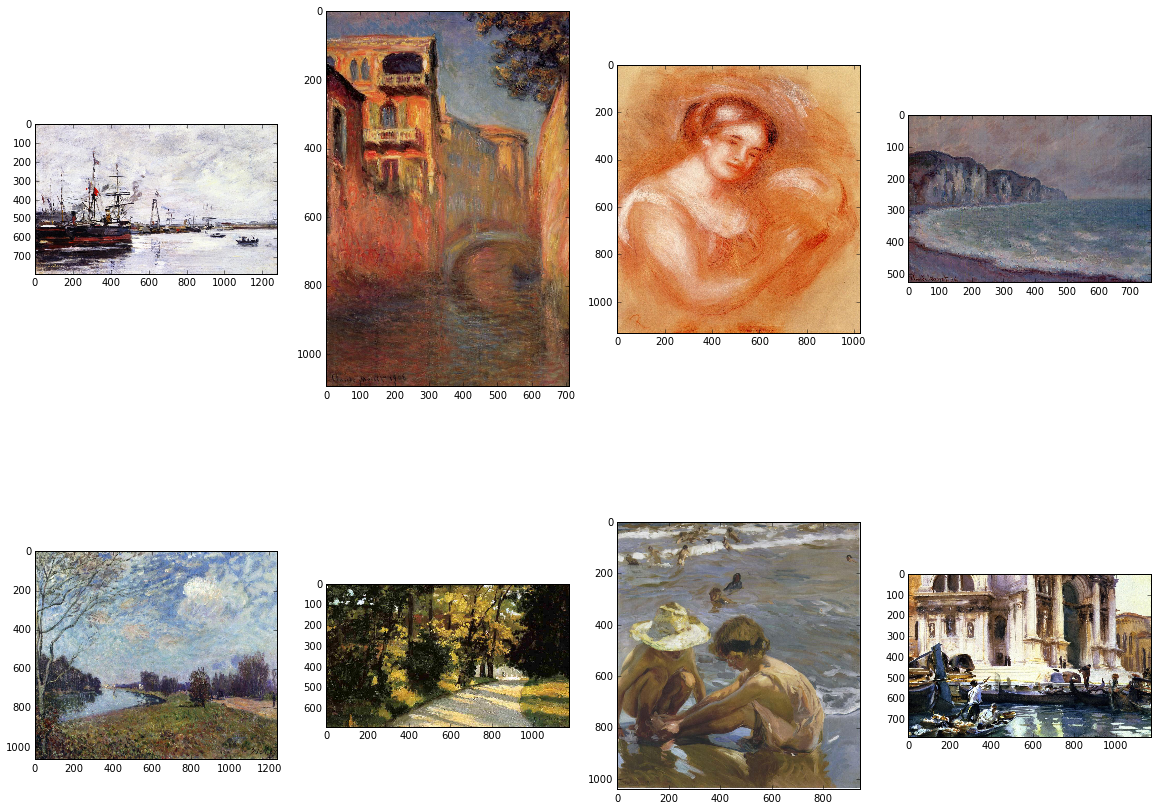

In [46]:
plot_columns(sample_painting1)

In [47]:
sample_painting = train_art[train_art['art_movement']=='Post-Impressionist']

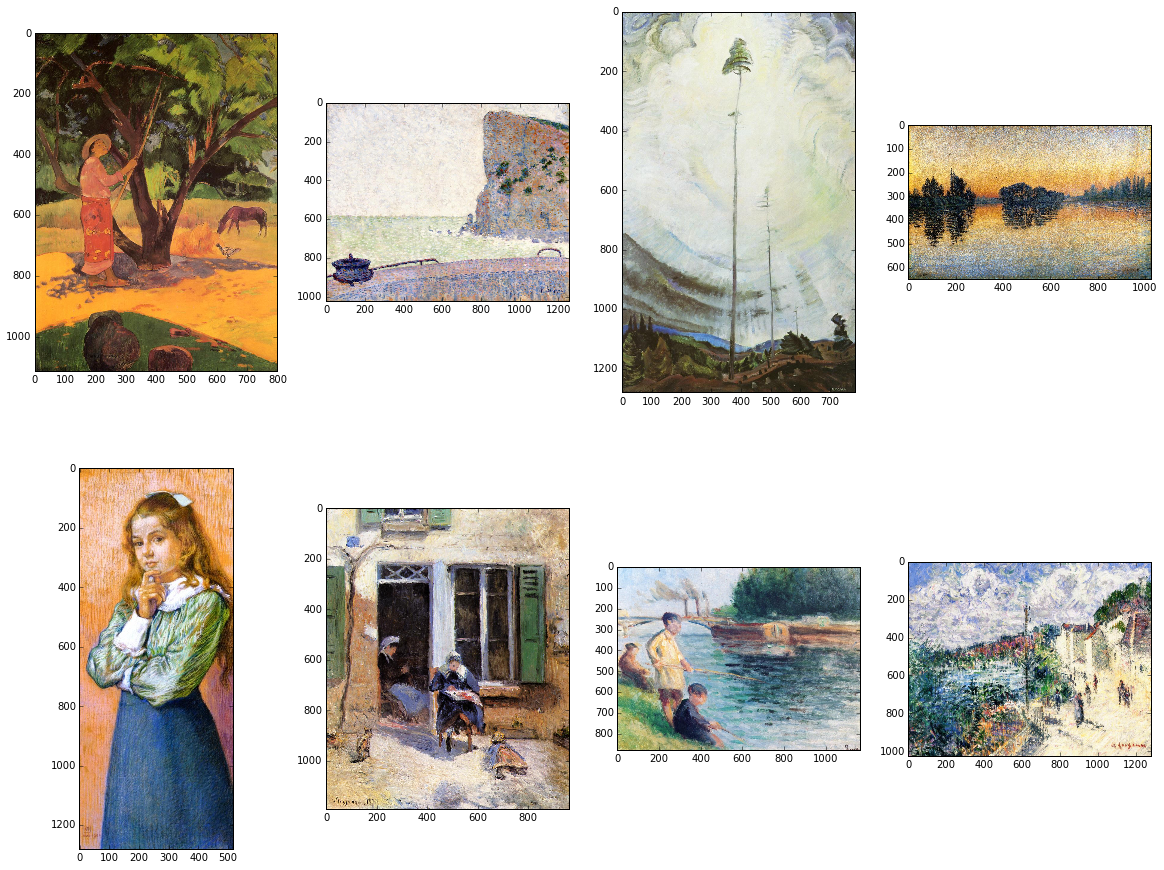

In [48]:
plot_columns(sample_painting)

In [28]:

from matplotlib import pyplot as plt
from PIL import Image

def plot_columns(sample_painting):
    if len(sample_painting) > 8:
        sample_painting = sample_painting.sample(8)

    size = len(sample_painting)
    y = 1 if size <= 4 else 2
    x = size if y == 1 else (size + 1) // 2
    f, ax = plt.subplots(y, x, figsize = (20,15))
    for i in range(size):
        im = Image.open('data/images_athenaeum/full/%d/%d.jpg' % (sample_painting.iloc[i]['author_id'],
                                                                  sample_painting.iloc[i]['painting_id']))
        if size == 1:
            ax.imshow(im)
        elif y == 1:
            ax[i].imshow(im)
        else:
            ax[i / x, i % x].imshow(im)

In [51]:
movement_train = pd.read_csv('data/athenaeum_painting_movement_train.csv')
movement_test = pd.read_csv('data/athenaeum_painting_movement_test.csv')
movement_train.head()

,medium,painting_location,height,article_type,painting_url,painting_dates,painting_title,author_id,painting_id,width,height_px,width_px,art_movement,sup_art_movement
0,oil on canvas,Gemeentemuseum Den Haag (Netherlands - The Ha...,62.0,Painting,http://www.the-athenaeum.org/art/display_image...,1867,Quai du Louvre,13,2976,87.0,724,1048,Impressionist,Impressionist
1,oil on canvas,Tate Britain - London (United Kingdom - London),36.5,Painting,http://www.the-athenaeum.org/art/display_image...,circa 1829,Salisbury Cathedral from the Meadows,1331,110620,51.1,778,1124,Romantic,Romantic
2,watercolor,Portland Museum of Art - Maine (United States...,NaN,Painting,http://www.the-athenaeum.org/art/display_image...,1873,Boy in a Boatyard,91,494,NaN,596,1129,Realist,Realist
3,fresco,Santa Maria Maddalena dei Pazzi (Italy - Flor...,NaN,Painting,http://www.the-athenaeum.org/art/display_image...,1494-1496,The Pazzi Crucifixion [detail],3546,38577,NaN,936,654,Renaissance,Renaissance
4,oil on cardboard,Private collection,44.5,Painting,http://www.the-athenaeum.org/art/display_image...,circa 1877-1879,The Flight into Egypt,368,53036,53.5,949,1170,Impressionist,Impressionist


In [52]:
color_hist2 = pd.read_csv('data/color_histograms.csv')

In [70]:
cols = ['author_id', 'painting_id', 'sup_art_movement', 'height_px', 'width_px']
movement_hist_train = movement_train[cols]\
    .merge(color_hist2, how = 'inner', on = ['author_id', 'painting_id'])
movement_hist_test = movement_test[cols]\
    .merge(color_hist2, how = 'inner', on = ['author_id', 'painting_id'])

In [71]:
movement_hist_train.head()

,author_id,painting_id,sup_art_movement,height_px,width_px,hist_01,hist_02,hist_03,hist_04,hist_05,...,hist_21,hist_22,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30
0,13,2976,Impressionist,724,1048,71770,3126,318,62,208,...,351080,80503,118821,121941,86407,84478,164793,128717,365962,14802
1,1331,110620,Romantic,778,1124,14463,17646,15218,16426,24870,...,438641,278498,130545,24645,2143,79277,246657,216543,245217,86778
2,91,494,Realist,596,1129,42455,3526,978,511,731,...,203884,256886,153416,49179,9519,125178,196978,160950,132081,57697
3,3546,38577,Renaissance,936,654,10344,7614,34497,22528,65165,...,213157,249315,123475,22566,3631,46903,148114,141054,191825,84248
4,368,53036,Impressionist,949,1170,138053,8994,1139,290,390,...,116763,516582,387389,85232,4364,399920,504641,154963,20366,30440


In [72]:
movement_hist_train['height_width_ratio'] = movement_hist_train['height_px'] / \
    movement_hist_train['width_px']
movement_hist_test['height_width_ratio'] = movement_hist_test['height_px'] / \
    movement_hist_test['width_px']

movement_hist_test = movement_hist_test.drop(['height_px', 'width_px'], axis=1)
movement_hist_train = movement_hist_train.drop(['height_px', 'width_px'], axis=1)

print "[INFO] The size of train histogram for Random Forest" + str(movement_hist_train.shape)
print "[INFO] The size of test histogram for Random Forest" + str(movement_hist_test.shape)
movement_hist_train.head()


[INFO] The size of train histogram for Random Forest(67059, 34)
[INFO] The size of test histogram for Random Forest(28740, 34)


,author_id,painting_id,sup_art_movement,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,...,hist_22,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_width_ratio
0,13,2976,Impressionist,71770,3126,318,62,208,656,290,...,80503,118821,121941,86407,84478,164793,128717,365962,14802,0.690840
1,1331,110620,Romantic,14463,17646,15218,16426,24870,37261,33310,...,278498,130545,24645,2143,79277,246657,216543,245217,86778,0.692171
2,91,494,Realist,42455,3526,978,511,731,979,635,...,256886,153416,49179,9519,125178,196978,160950,132081,57697,0.527901
3,3546,38577,Renaissance,10344,7614,34497,22528,65165,38233,12834,...,249315,123475,22566,3631,46903,148114,141054,191825,84248,1.431193
4,368,53036,Impressionist,138053,8994,1139,290,390,485,265,...,516582,387389,85232,4364,399920,504641,154963,20366,30440,0.811111


In [73]:
# movement_hist_train.to_csv('data/movement_hist_train.csv', index=False)
# movement_hist_test.to_csv('data/movement_hist_test.csv', index=False)


In [119]:
top_movements = dict(movement_hist_train['sup_art_movement'].value_counts()[:3])
top_movements

{'Baroque': 9119, 'Impressionist': 12694, 'Realist': 8020}

In [59]:
# dict(top_movements)

{'Baroque': 9119, 'Impressionist': 12694, 'Realist': 8020}

In [64]:
total_samples = sum(top_movements.values())
class_weights = dict([(key, total_samples / (float(len(top_movements))
                                             * top_movements[key]))
                      for key in top_movements])

In [65]:
class_weights

{'Baroque': 1.0905070000365538,
 'Impressionist': 0.78338847749592988,
 'Realist': 1.2399418121363259}

# Data for Stacking XGBoost

In [8]:
pca20_kmeans_train = pd.read_csv('data/pca20_kmeans_train.csv')
pca20_kmeans_test = pd.read_csv('data/pca20_kmeans_test.csv')
print pca20_kmeans_test.shape

pca20_kmeans_test.head(3)

(12473, 23)


,painting_id,height_width_ratio,pca_00,pca_01,pca_02,pca_03,pca_04,pca_05,pca_06,pca_07,...,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,kmeans_labels
0,12077,0.693750,3.294566,-0.349872,0.016798,0.085442,0.024204,0.106316,-0.176727,-0.074609,...,0.009899,0.021965,-0.001501,0.100845,-0.005866,-0.002279,0.035059,-0.001407,0.039595,6
1,87820,0.680469,-2.705226,-0.361565,-0.183141,0.000097,0.056799,0.096745,-0.049363,0.007594,...,0.010934,0.025259,-0.013142,0.008569,0.025545,-0.002439,0.032441,0.003134,0.022360,0
2,207859,0.726695,-2.713336,-0.435513,0.106566,0.100105,0.082877,0.050818,0.248081,-0.018881,...,0.009291,0.000948,-0.056400,0.029767,0.006661,-0.012580,-0.010395,-0.056754,0.022901,2


In [4]:
nn_train = pd.read_csv('nn_trained/net1/train_activations.csv')
nn_test = pd.read_csv('nn_trained/net1/test_activations.csv')


nn_train.head(2)

,author_id,painting_id,nn_01,nn_02,nn_03,nn_04,nn_05,nn_06,nn_07,nn_08,...,nn_41,nn_42,nn_43,nn_44,nn_45,nn_46,nn_47,nn_48,nn_49,nn_50
0,1793,89493,1.209929,0.320030,0.0,0.0,0.686977,0.80809,0.0,0.298580,...,0.0,0.026261,0.484860,0.0,0.572419,1.446369,0.522112,0.571415,0.0,0.585037
1,368,53260,0.473508,0.140545,0.0,0.0,0.960494,0.76018,0.0,0.514217,...,0.0,0.000000,1.084277,0.0,0.314204,0.862004,0.470957,1.475356,0.0,1.441862


In [9]:
nn_pca_train = nn_train.merge(pca20_kmeans_train, how='inner', on='painting_id')
nn_pca_test = nn_test.merge(pca20_kmeans_test, how='inner', on='painting_id')

print nn_pca_test.shape
print nn_pca_train.shape

nn_pca_train.head(2)

(1011, 74)
(4042, 74)


,author_id,painting_id,nn_01,nn_02,nn_03,nn_04,nn_05,nn_06,nn_07,nn_08,...,pca_11,pca_12,pca_13,pca_14,pca_15,pca_16,pca_17,pca_18,pca_19,kmeans_labels
0,1793,89493,1.209929,0.320030,0.0,0.0,0.686977,0.80809,0.0,0.298580,...,-0.044231,-0.021356,-0.013008,-0.002617,0.025611,0.015427,-0.023150,0.001554,-0.004448,2
1,368,53260,0.473508,0.140545,0.0,0.0,0.960494,0.76018,0.0,0.514217,...,-0.076586,0.011988,0.194509,-0.016484,0.041777,0.079497,0.031914,-0.035633,-0.009105,3


In [10]:
nn_pca_train.columns

Index([u'author_id', u'painting_id', u'nn_01', u'nn_02', u'nn_03', u'nn_04',
       u'nn_05', u'nn_06', u'nn_07', u'nn_08', u'nn_09', u'nn_10', u'nn_11',
       u'nn_12', u'nn_13', u'nn_14', u'nn_15', u'nn_16', u'nn_17', u'nn_18',
       u'nn_19', u'nn_20', u'nn_21', u'nn_22', u'nn_23', u'nn_24', u'nn_25',
       u'nn_26', u'nn_27', u'nn_28', u'nn_29', u'nn_30', u'nn_31', u'nn_32',
       u'nn_33', u'nn_34', u'nn_35', u'nn_36', u'nn_37', u'nn_38', u'nn_39',
       u'nn_40', u'nn_41', u'nn_42', u'nn_43', u'nn_44', u'nn_45', u'nn_46',
       u'nn_47', u'nn_48', u'nn_49', u'nn_50', u'height_width_ratio',
       u'pca_00', u'pca_01', u'pca_02', u'pca_03', u'pca_04', u'pca_05',
       u'pca_06', u'pca_07', u'pca_08', u'pca_09', u'pca_10', u'pca_11',
       u'pca_12', u'pca_13', u'pca_14', u'pca_15', u'pca_16', u'pca_17',
       u'pca_18', u'pca_19', u'kmeans_labels'],
      dtype='object')

In [11]:
nn_pca_train.to_csv('data/nn_pca_train.csv', index=False)
nn_pca_test.to_csv('data/nn_pca_test.csv', index=False)

# Using color histogram

In [19]:
test_hist_kmeans = pd.read_csv('data/test_hist_kmeans.csv')
train_hist_kmeans = pd.read_csv('data/train_hist_kmeans.csv')

print test_hist_kmeans.shape
print train_hist_kmeans.shape
test_hist_kmeans.head(1)

(12473, 34)
(49890, 34)


,author_id,painting_id,hist_01,hist_02,hist_03,hist_04,hist_05,hist_06,hist_07,hist_08,...,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_width_ratio,kmeans_labels
0,444,12077,0.017124,0.0038,0.001322,0.000784,0.000908,0.001212,0.001511,0.00216,...,0.223286,0.156619,0.054376,0.105572,0.21943,0.264793,0.230477,0.179727,0.69375,6


In [20]:
nn_train = pd.read_csv('nn_trained/net1/train_activations.csv')
nn_test = pd.read_csv('nn_trained/net1/test_activations.csv')


nn_train.head(2)

,author_id,painting_id,nn_01,nn_02,nn_03,nn_04,nn_05,nn_06,nn_07,nn_08,...,nn_41,nn_42,nn_43,nn_44,nn_45,nn_46,nn_47,nn_48,nn_49,nn_50
0,1793,89493,1.209929,0.320030,0.0,0.0,0.686977,0.80809,0.0,0.298580,...,0.0,0.026261,0.484860,0.0,0.572419,1.446369,0.522112,0.571415,0.0,0.585037
1,368,53260,0.473508,0.140545,0.0,0.0,0.960494,0.76018,0.0,0.514217,...,0.0,0.000000,1.084277,0.0,0.314204,0.862004,0.470957,1.475356,0.0,1.441862


In [24]:
nn_kmeans_train = nn_train.merge(train_hist_kmeans.iloc[:, 1:], how='inner', on='painting_id')
nn_kmeans_test = nn_test.merge(test_hist_kmeans.iloc[:, 1:], how='inner', on='painting_id')

print nn_kmeans_train.shape
print nn_kmeans_test.shape

nn_kmeans_train.head(2)

(4042, 84)
(1011, 84)


,author_id,painting_id,nn_01,nn_02,nn_03,nn_04,nn_05,nn_06,nn_07,nn_08,...,hist_23,hist_24,hist_25,hist_26,hist_27,hist_28,hist_29,hist_30,height_width_ratio,kmeans_labels
0,1793,89493,1.209929,0.320030,0.0,0.0,0.686977,0.80809,0.0,0.298580,...,0.296920,0.054243,0.000393,0.173600,0.197649,0.110999,0.208883,0.308868,1.521395,1
1,368,53260,0.473508,0.140545,0.0,0.0,0.960494,0.76018,0.0,0.514217,...,0.360606,0.147781,0.061759,0.124769,0.129688,0.230780,0.299710,0.215052,0.729915,6


In [25]:
nn_kmeans_train.columns

Index([u'author_id', u'painting_id', u'nn_01', u'nn_02', u'nn_03', u'nn_04',
       u'nn_05', u'nn_06', u'nn_07', u'nn_08', u'nn_09', u'nn_10', u'nn_11',
       u'nn_12', u'nn_13', u'nn_14', u'nn_15', u'nn_16', u'nn_17', u'nn_18',
       u'nn_19', u'nn_20', u'nn_21', u'nn_22', u'nn_23', u'nn_24', u'nn_25',
       u'nn_26', u'nn_27', u'nn_28', u'nn_29', u'nn_30', u'nn_31', u'nn_32',
       u'nn_33', u'nn_34', u'nn_35', u'nn_36', u'nn_37', u'nn_38', u'nn_39',
       u'nn_40', u'nn_41', u'nn_42', u'nn_43', u'nn_44', u'nn_45', u'nn_46',
       u'nn_47', u'nn_48', u'nn_49', u'nn_50', u'hist_01', u'hist_02',
       u'hist_03', u'hist_04', u'hist_05', u'hist_06', u'hist_07', u'hist_08',
       u'hist_09', u'hist_10', u'hist_11', u'hist_12', u'hist_13', u'hist_14',
       u'hist_15', u'hist_16', u'hist_17', u'hist_18', u'hist_19', u'hist_20',
       u'hist_21', u'hist_22', u'hist_23', u'hist_24', u'hist_25', u'hist_26',
       u'hist_27', u'hist_28', u'hist_29', u'hist_30', u'height_width_rati

In [26]:
nn_kmeans_train.to_csv('data/nn_kmeans_train.csv', index=False)
nn_kmeans_test.to_csv('data/nn_kmeans_test.csv', index=False)

# predicted result


In [124]:
random_forest = ['random_forest', 0.686449060336, 0.668644906034]
xgboost = ['xgboost', 0.79440870856, 0.71315529179]
naive_bayes = ['naive_bayes', 0.59940652819, 0.623145400593]
extra_tree = ['extra_tree', 0.673590504451, 0.660731948566]
knn = ['knn', 0.705838693716, 0.686449060336]
grad_boost = ['grad_boost', 0.747774480712, 0.729970326409]

model_accuracy = pd.DataFrame([naive_bayes, extra_tree, random_forest, knn, grad_boost, xgboost], \
                              columns=['model_name', 'color_hist', 'pca'])
model_accuracy


,model_name,color_hist,pca
0,naive_bayes,0.599407,0.623145
1,extra_tree,0.673591,0.660732
2,random_forest,0.686449,0.668645
3,knn,0.705839,0.686449
4,grad_boost,0.747774,0.729970
5,xgboost,0.794409,0.713155


In [5]:
model_accuracy.to_csv('data/model_accuracy.csv', index=False)

In [5]:
xgb = pd.read_csv('data/xgb_com.csv')
knn = pd.read_csv('data/knn_com.csv')
nbc = pd.read_csv('data/nbc_com.csv')
rf = pd.read_csv('data/rf_com.csv')
extra_tree = pd.read_csv('data/extra_tree_com.csv')
grad_boost = pd.read_csv('data/grad_boost_com.csv')



In [33]:
xgb_24 = xgb[xgb['actual'] == 24].head(5)
xgb_24

,actual,xgb_pred,xgb_res,xgb_pca_pred,xgb_pca_res
0,24,24,True,24,True
1,24,24,True,24,True
2,24,24,True,24,True
3,24,24,True,368,False
4,24,24,True,24,True


In [34]:
knn_24 = knn[knn['actual'] == 24].head(5)
knn_24

,actual,knn_pred,knn_res,knn_pca_pred,knn_pca_res
0,24,24,True,24,True
1,24,24,True,24,True
2,24,24,True,24,True
3,24,24,True,368,False
4,24,24,True,24,True


In [35]:
nbc_24 = nbc[nbc['actual'] == 24].head(5)
nbc_24

,actual,nbc_pred,nbc_res,nbc_pca_pred,nbc_pca_res
0,24,24,True,24,True
1,24,24,True,24,True
2,24,24,True,24,True
3,24,24,True,368,False
4,24,24,True,24,True


In [36]:
rf_24 = rf[rf['actual'] == 24].head(5)
rf_24

,actual,rf_pred,rf_res,rf_pca_pred,rf_pca_res
0,24,24,True,24,True
1,24,24,True,24,True
2,24,24,True,1793,False
3,24,24,True,368,False
4,24,24,True,1793,False


In [37]:
extra_tree_24 = extra_tree[extra_tree['actual'] == 24].head(5)
extra_tree_24

,actual,extra_tree_pred,extra_tree_res,extra_tree_pca_pred,extra_tree_pca_res
0,24,24,True,24,True
1,24,24,True,24,True
2,24,24,True,24,True
3,24,24,True,368,False
4,24,24,True,24,True


In [48]:
grad_boost_24 = grad_boost[grad_boost['actual'] == 24].head(5)
grad_boost_24

,actual,grad_boost_pred,grad_boost_res,grad_boost_pca_pred,grad_boost_pca_res
0,24,24,True,24,True
1,24,24,True,24,True
2,24,24,True,24,True
3,24,24,True,368,False
4,24,24,True,24,True


In [64]:
model_6 = xgb_24.merge(nbc_24, how='inner', on='actual')\
.merge(knn_24, how='inner', on='actual')\
.merge(rf_24, how='inner', on='actual')\
.merge(extra_tree_24, how='inner', on='actual')\
.merge(grad_boost_24, how='inner', on='actual')
model_6

,actual,xgb_pred,xgb_res,xgb_pca_pred,xgb_pca_res,nbc_pred,nbc_res,nbc_pca_pred,nbc_pca_res,knn_pred,...,rf_pca_pred,rf_pca_res,extra_tree_pred,extra_tree_res,extra_tree_pca_pred,extra_tree_pca_res,grad_boost_pred,grad_boost_res,grad_boost_pca_pred,grad_boost_pca_res
0,24,24,True,24,True,24,True,24,True,24,...,24,True,24,True,24,True,24,True,24,True
1,24,24,True,24,True,24,True,24,True,24,...,24,True,24,True,24,True,24,True,24,True
2,24,24,True,24,True,24,True,24,True,24,...,24,True,24,True,24,True,24,True,24,True
3,24,24,True,24,True,24,True,24,True,24,...,24,True,24,True,24,True,24,True,368,False
4,24,24,True,24,True,24,True,24,True,24,...,24,True,24,True,24,True,24,True,24,True
5,24,24,True,24,True,24,True,24,True,24,...,24,True,24,True,24,True,24,True,24,True
6,24,24,True,24,True,24,True,24,True,24,...,24,True,24,True,24,True,24,True,24,True
7,24,24,True,24,True,24,True,24,True,24,...,24,True,24,True,24,True,24,True,24,True
8,24,24,True,24,True,24,True,24,True,24,...,24,True,24,True,24,True,24,True,368,False
9,24,24,True,24,True,24,True,24,True,24,...,24,True,24,True,24,True,24,True,24,True


In [46]:
model_6.shape

(15625, 25)

In [67]:
model_6[['xgb_res', 'xgb_pca_res', 'nbc_res', 'nbc_pca_res', \
        'knn_res', 'rf_res', 'rf_pca_res', 'extra_tree_res', 'extra_tree_pca_res', \
       'extra_tree_pca_res', 'grad_boost_res', 'grad_boost_pca_res']].iloc[10:20, :]\
    .rename(columns={'xgb_res': 'xgb', 'xgb_pca_res': 'xgb_pca', 'extra_tree_res': 'extra_tree', 
            'grad_boost_res': 'grad_boost', 'grad_boost_pca_res': 'grad_boost_pca'})


,xgb,xgb_pca,nbc_res,nbc_pca_res,knn_res,rf_res,rf_pca_res,extra_tree,extra_tree_pca_res,extra_tree_pca_res,grad_boost,grad_boost_pca
10,True,True,True,True,True,True,True,True,True,True,True,True
11,True,True,True,True,True,True,True,True,True,True,True,True
12,True,True,True,True,True,True,True,True,True,True,True,True
13,True,True,True,True,True,True,True,True,True,True,True,False
14,True,True,True,True,True,True,True,True,True,True,True,True
15,True,True,True,True,True,True,True,True,False,False,True,True
16,True,True,True,True,True,True,True,True,False,False,True,True
17,True,True,True,True,True,True,True,True,False,False,True,True
18,True,True,True,True,True,True,True,True,False,False,True,False
19,True,True,True,True,True,True,True,True,False,False,True,True
